In [1]:
import random
import math
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, MiniBatchKMeans, AgglomerativeClustering
from sklearn.metrics.pairwise import pairwise_distances_argmin
from sklearn.decomposition import PCA
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram

mpl.rcParams['figure.dpi'] = 200

data = pd.read_csv('iris.data',header=None)
no_labeled_data = data.iloc[:,:-1]
no_labeled_data

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [2]:
k_means = KMeans(init='k-means++', n_clusters=3, n_init=15)
k_means.fit(no_labeled_data)

KMeans(n_clusters=3, n_init=15)

In [3]:
k_means_cluster_centers = k_means.cluster_centers_
k_means_labels = pairwise_distances_argmin(no_labeled_data, k_means_cluster_centers)

[<AxesSubplot:> <AxesSubplot:> <AxesSubplot:>]


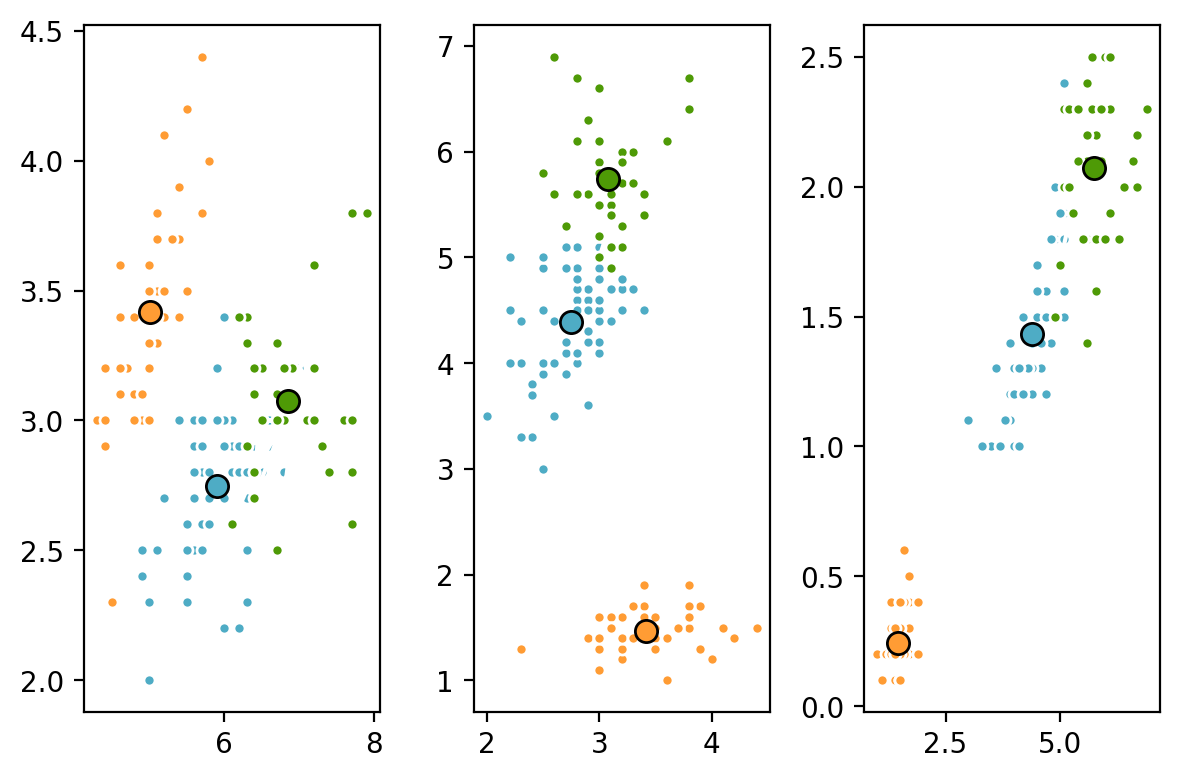

In [41]:
def kmeans_plot(km, data):
    f, ax = plt.subplots(1, 3)

    colors = ['#4EACC5', '#FF9C34', '#4E9A06', '#8a1fb5', '#872222']

    print(ax)

    for i in range(3):
        my_members = km.labels_ == i
        cluster_center = k_means.cluster_centers_[i]
        for j in range(3):
            ax[j].plot(data[my_members][j], data[my_members][j+1], 'w', markerfacecolor=colors[i], marker='o', markersize=4)
            ax[j].plot(cluster_center[j], cluster_center[j+1], 'o', markerfacecolor=colors[i], markeredgecolor='k', markersize=8)
    plt.tight_layout()
    plt.show()
kmeans_plot(k_means, no_labeled_data)

In [5]:
pca = PCA(n_components = 2)
pca_data = pca.fit(no_labeled_data).transform(no_labeled_data)

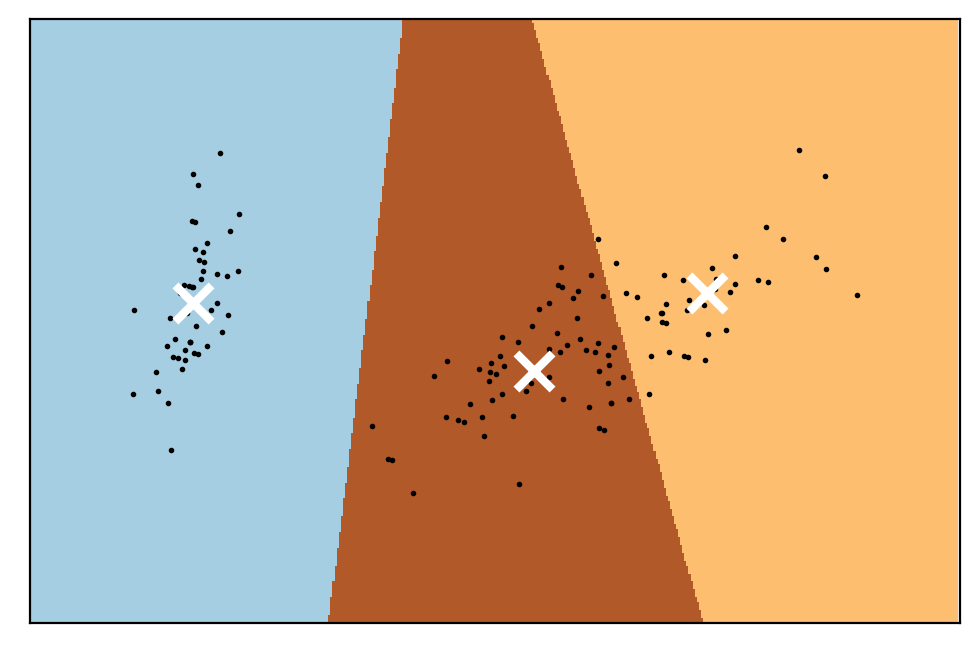

In [6]:
kmeans = KMeans(init='k-means++', n_clusters=3, n_init=15)
kmeans.fit(pca_data)
# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = pca_data[:, 0].min() - 1, pca_data[:, 0].max() + 1
y_min, y_max = pca_data[:, 1].min() - 1, pca_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(pca_data[:, 0], pca_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

[<AxesSubplot:> <AxesSubplot:> <AxesSubplot:>]


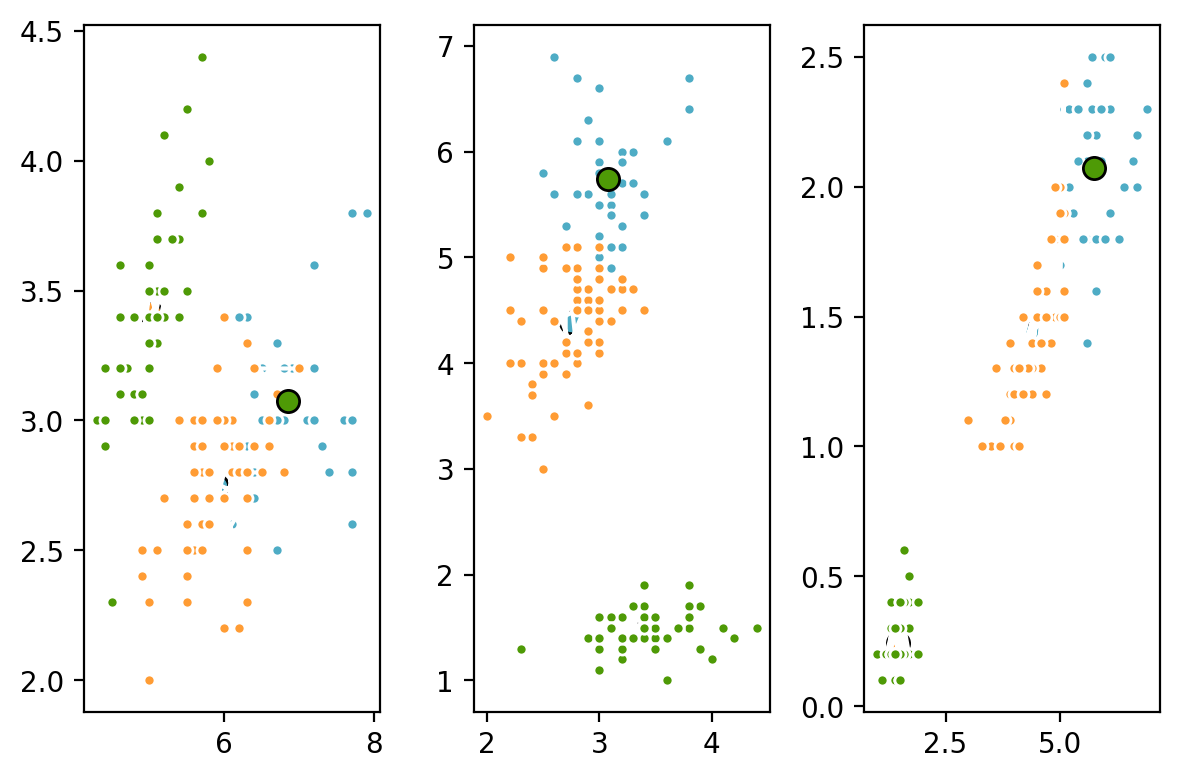

[<AxesSubplot:> <AxesSubplot:> <AxesSubplot:>]


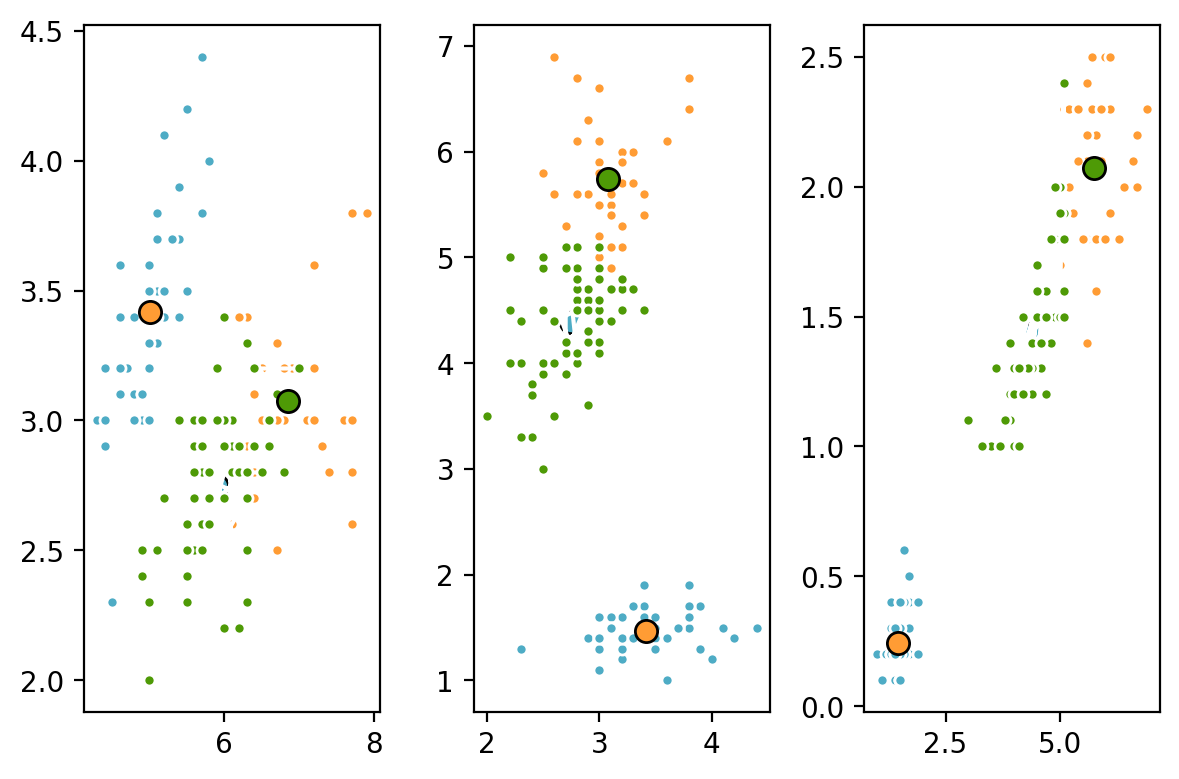

[<AxesSubplot:> <AxesSubplot:> <AxesSubplot:>]


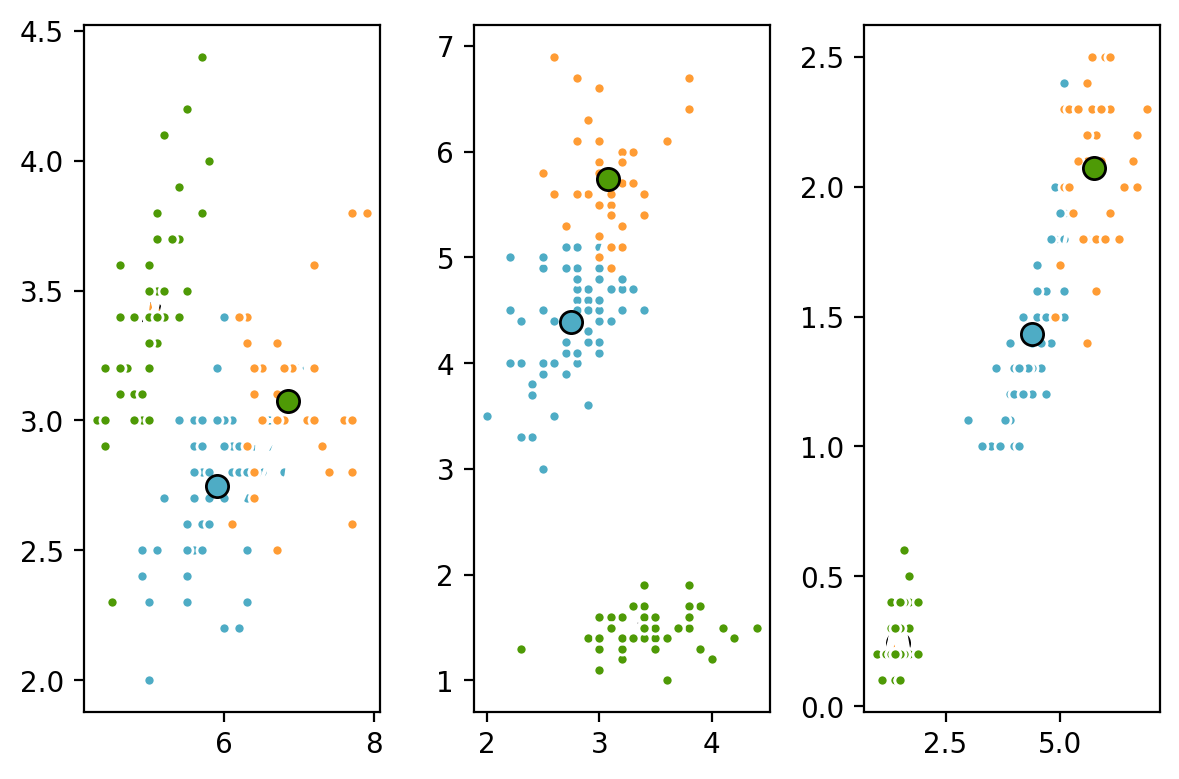

In [31]:
for i in range(3):
    random_k_means = KMeans(init='random', n_clusters=3, n_init=15)
    random_k_means.fit(no_labeled_data)
    kmeans_plot(random_k_means, no_labeled_data)

[<AxesSubplot:> <AxesSubplot:> <AxesSubplot:>]


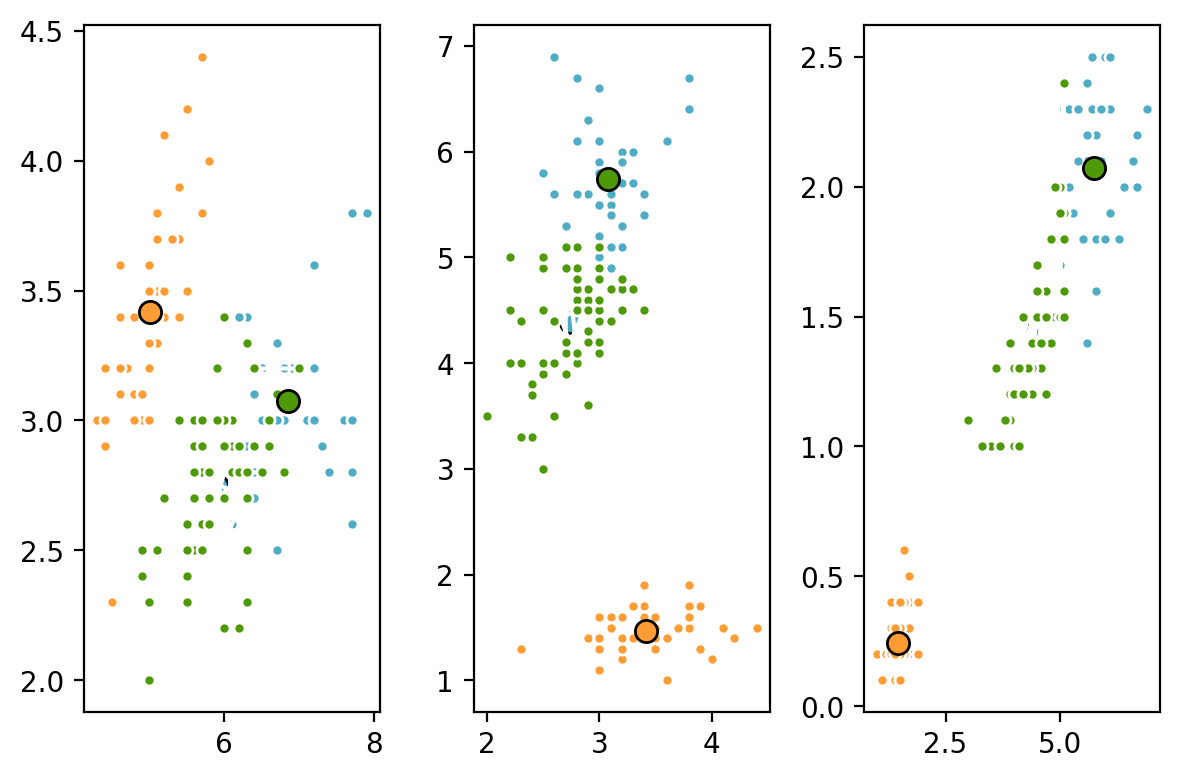

In [26]:
arr_k_means = KMeans(init=np.array([[1, 1, 1, 1], [2, 2, 2, 2], [3, 3, 3, 3]]), n_clusters=3, n_init=1)
arr_k_means.fit(no_labeled_data)
kmeans_plot(arr_k_means, no_labeled_data)

[<AxesSubplot:> <AxesSubplot:> <AxesSubplot:>]


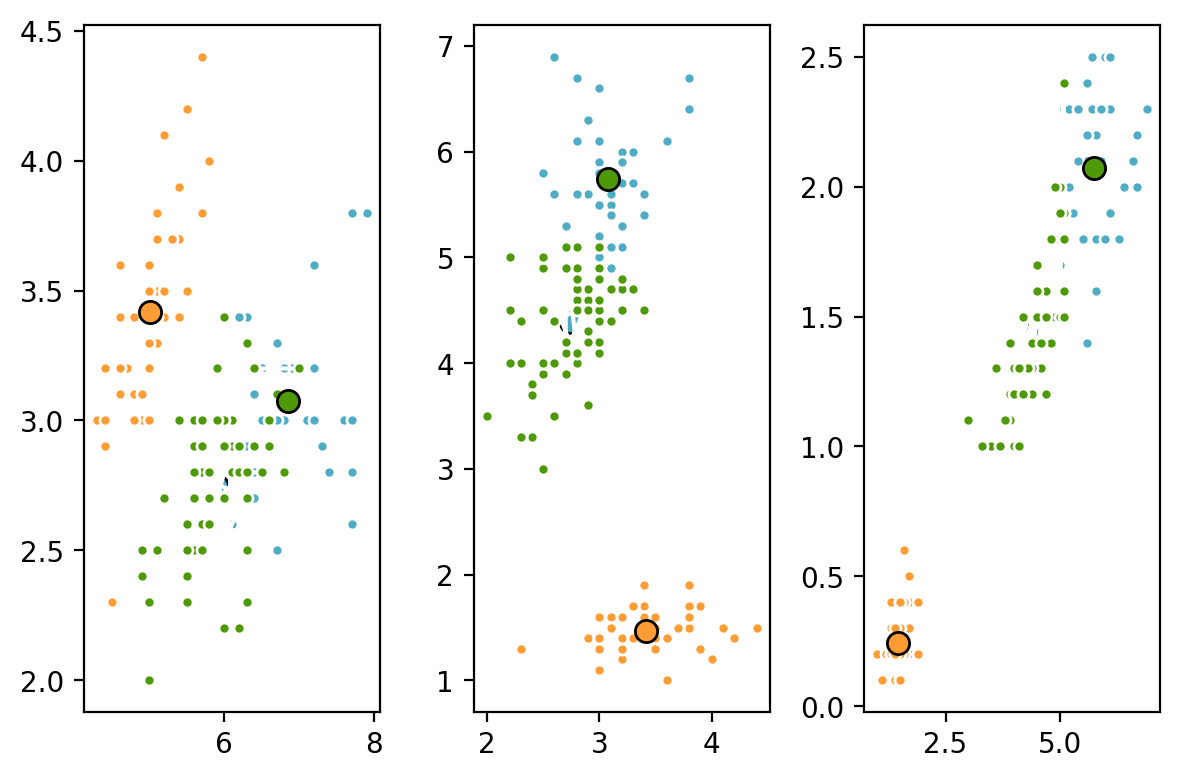

In [27]:
arr_k_means = KMeans(init=np.array([[50, 50, 50, 50], [0, 0, 0, 0], [-50, -50, -50, -50]]), n_clusters=3, n_init=1)
arr_k_means.fit(no_labeled_data)
kmeans_plot(arr_k_means, no_labeled_data)

[<AxesSubplot:> <AxesSubplot:> <AxesSubplot:>]


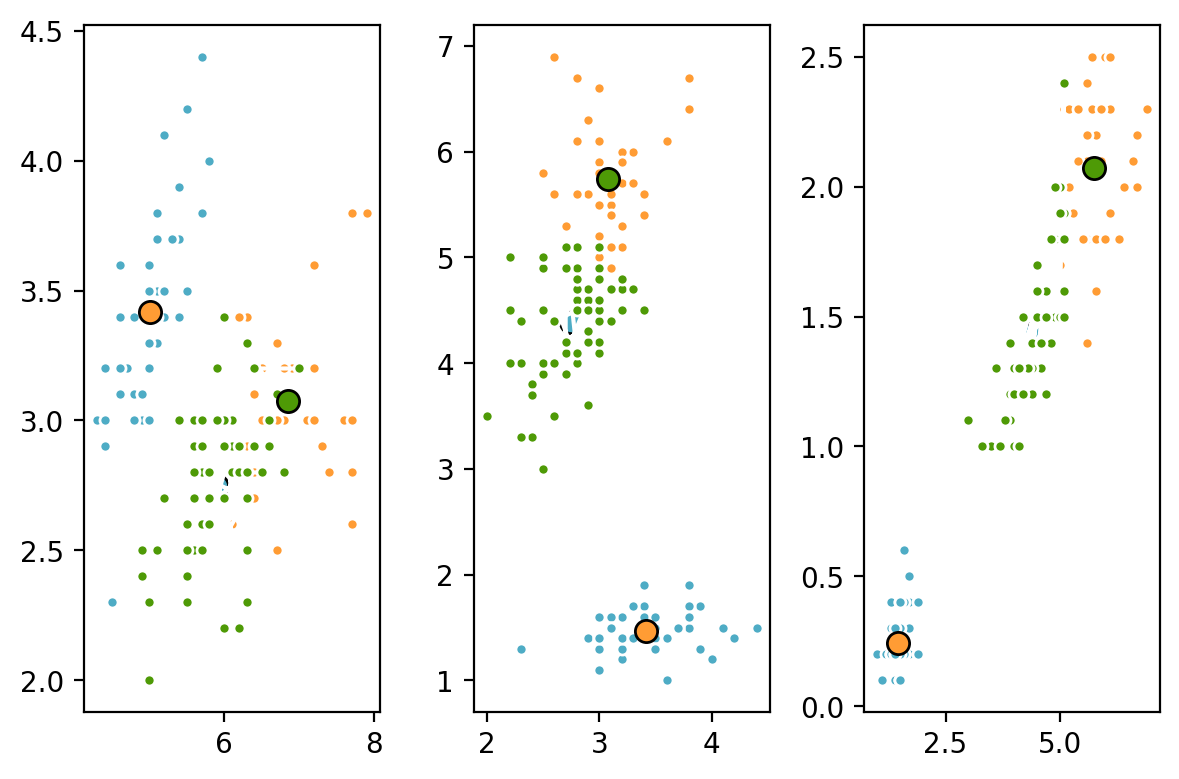

In [29]:
arr_k_means = KMeans(init=np.array([[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]]), n_clusters=3, n_init=1)
arr_k_means.fit(no_labeled_data)
kmeans_plot(arr_k_means, no_labeled_data)

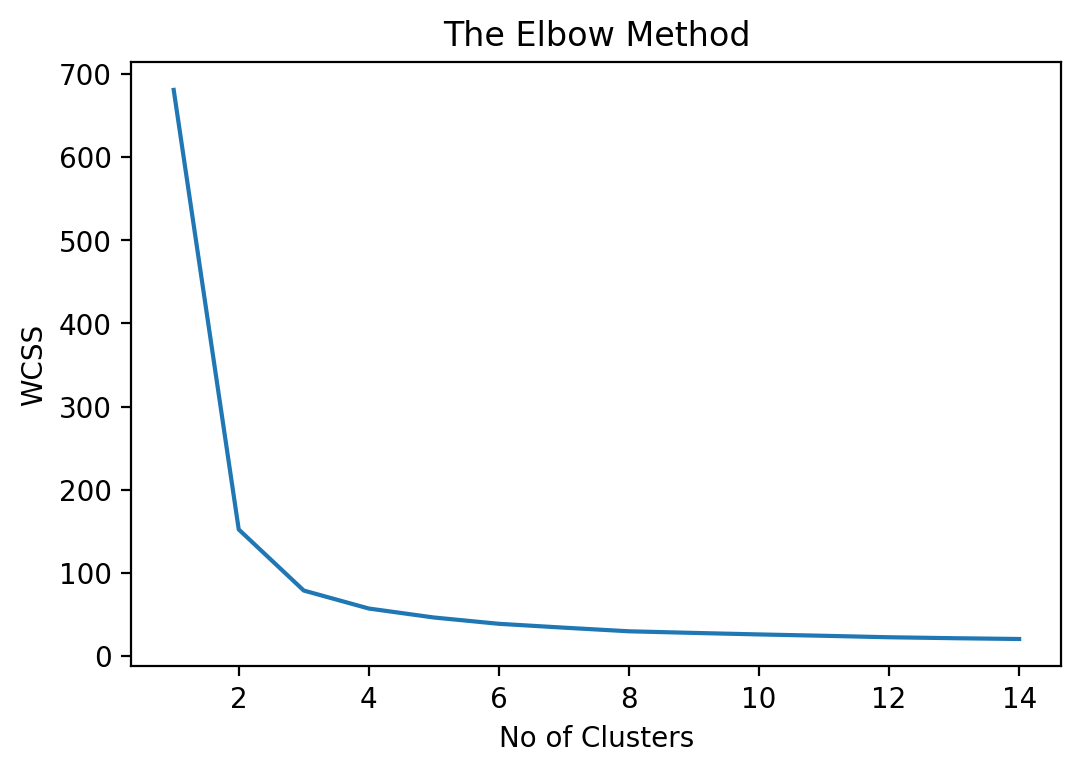

In [11]:
wcss=[]
for i in range(1,15):
    kmean = KMeans(n_clusters=i,init="k-means++")
    kmean.fit_predict(no_labeled_data)
    wcss.append(kmean.inertia_)

plt.plot(range(1,15),wcss)
plt.title('The Elbow Method')
plt.xlabel("No of Clusters")
plt.ylabel("WCSS")
plt.show()

[<AxesSubplot:> <AxesSubplot:> <AxesSubplot:>]


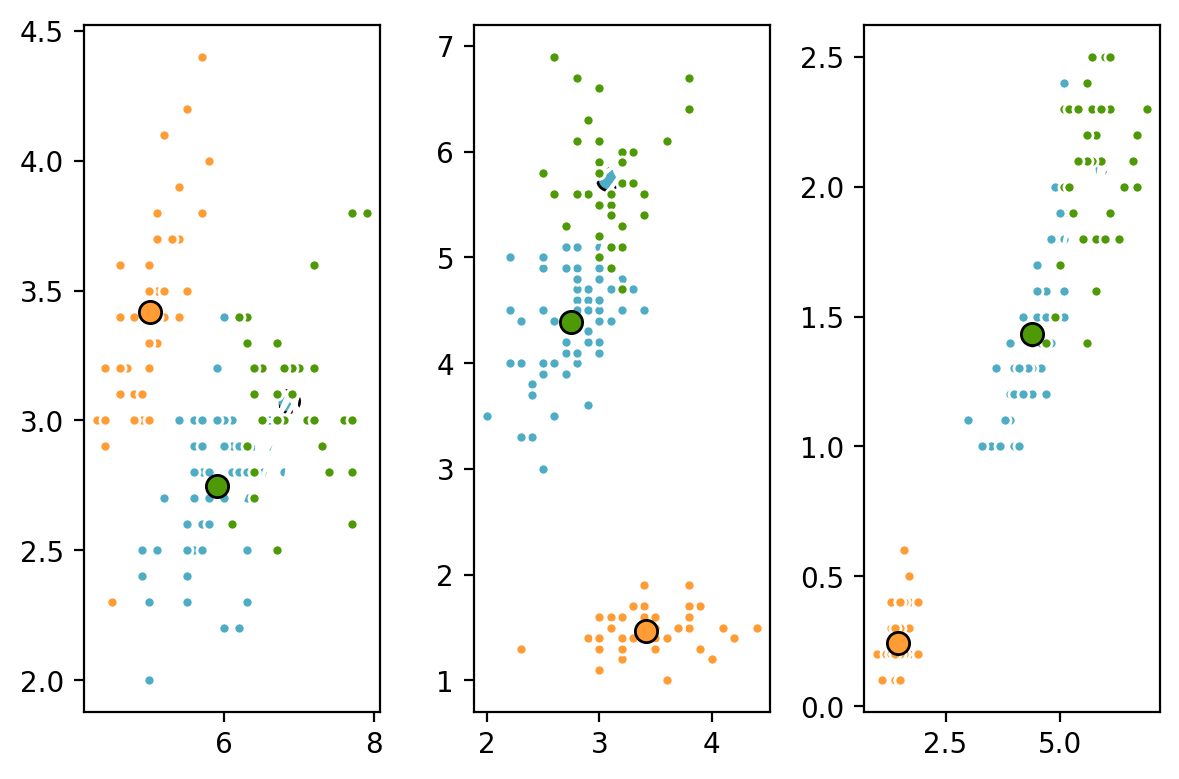

In [12]:
mbkmeans = MiniBatchKMeans(n_clusters=3, n_init=15)
mbkmeans.fit(no_labeled_data)
kmeans_plot(mbkmeans, no_labeled_data)

In [13]:
k_means = KMeans(init='k-means++', n_clusters=3, n_init=15)
k_means.fit(no_labeled_data)

diff = np.array([km != bkm for km, bkm in zip(k_means.labels_, mbkmeans.labels_)])
diff

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

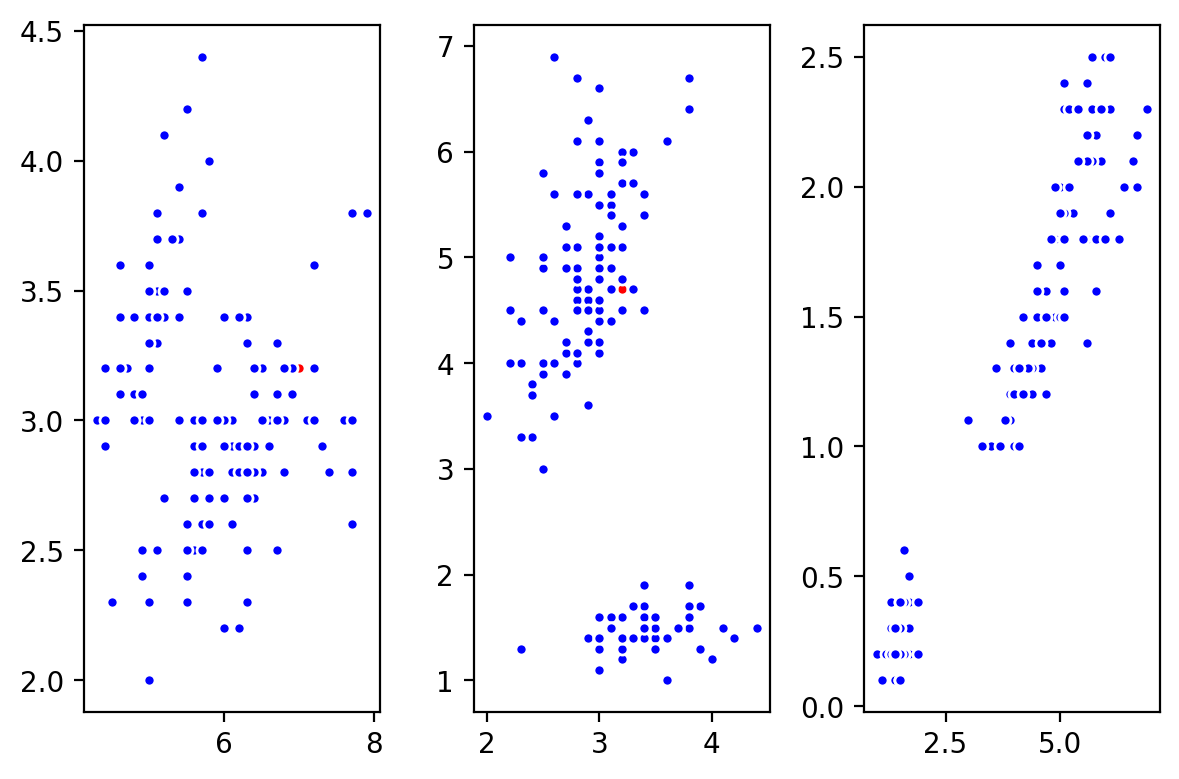

In [14]:
f, ax = plt.subplots(1, 3)

for j in range(3):
    ax[j].plot(no_labeled_data[diff][j], no_labeled_data[diff][j+1], 'w', markerfacecolor='r', marker='o', markersize=4, lw=0)
    ax[j].plot(no_labeled_data[~diff][j], no_labeled_data[~diff][j+1], 'w', markerfacecolor='b', marker='o', markersize=4, lw=0)

plt.tight_layout()
plt.show()

In [15]:
hier = AgglomerativeClustering(n_clusters=3, linkage='average')
hier = hier.fit(no_labeled_data)
hier_labels = hier.labels_

In [51]:
def hier_plot(hier_, data, num_of_clusters):
    f, ax = plt.subplots(1, 3)
    colors = ['#4EACC5', '#FF9C34', '#4E9A06', '#8a1fb5', '#872222']

    for i in range(num_of_clusters):
        my_members = hier_.labels_ == i
        for j in range(3):
            ax[j].plot(data[my_members][j], data[my_members][j+1], 'w', markerfacecolor=colors[i], marker='o', markersize=4)
    plt.tight_layout()
    plt.show()

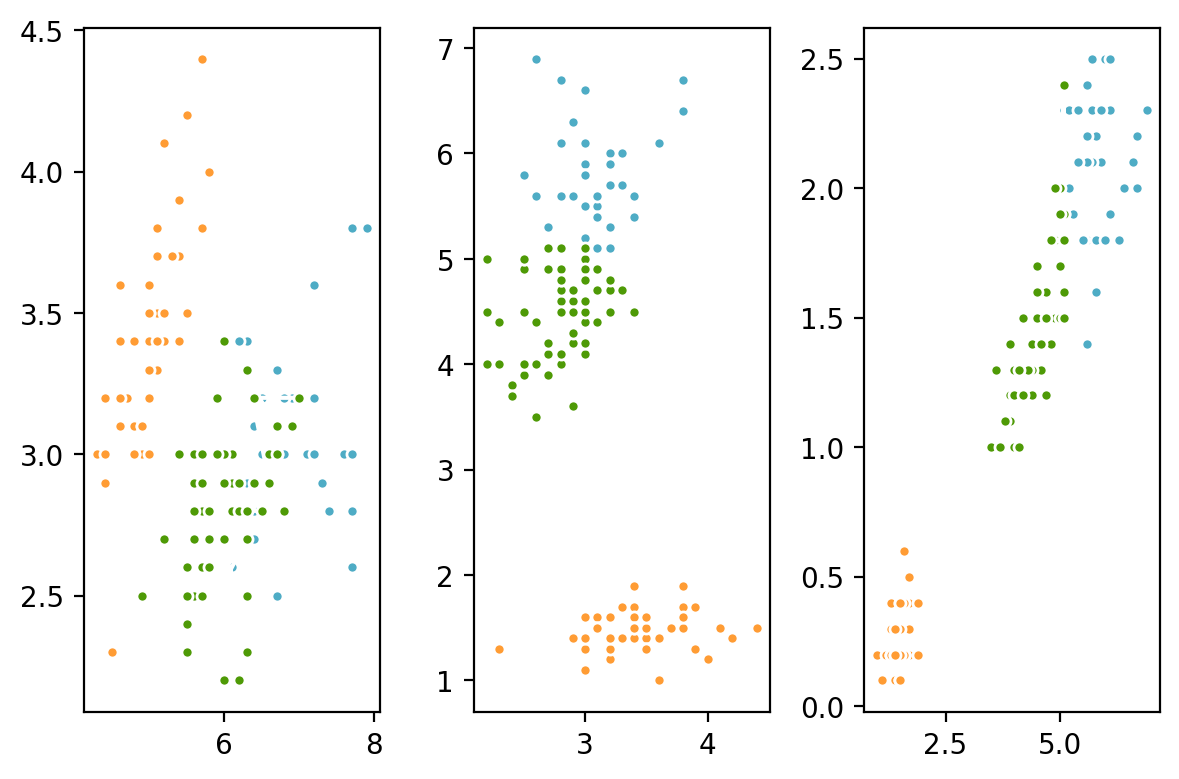

In [54]:
hier_plot(hier, no_labeled_data, 3)

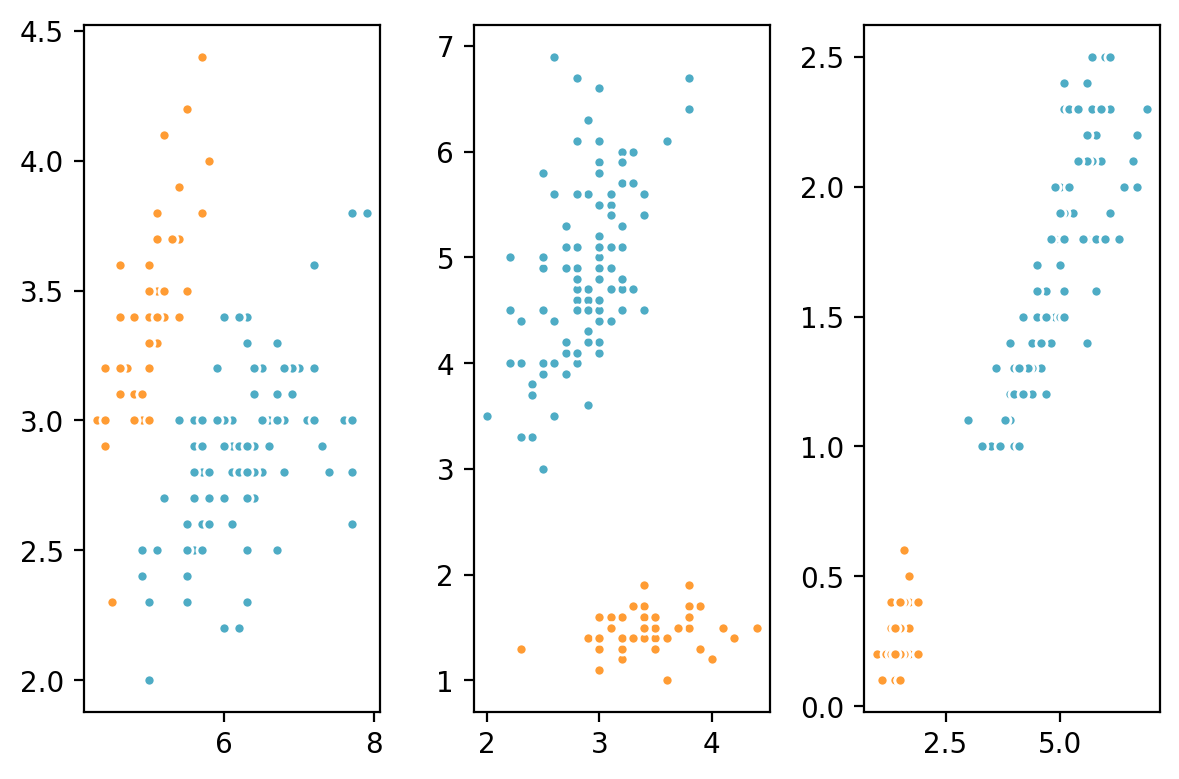

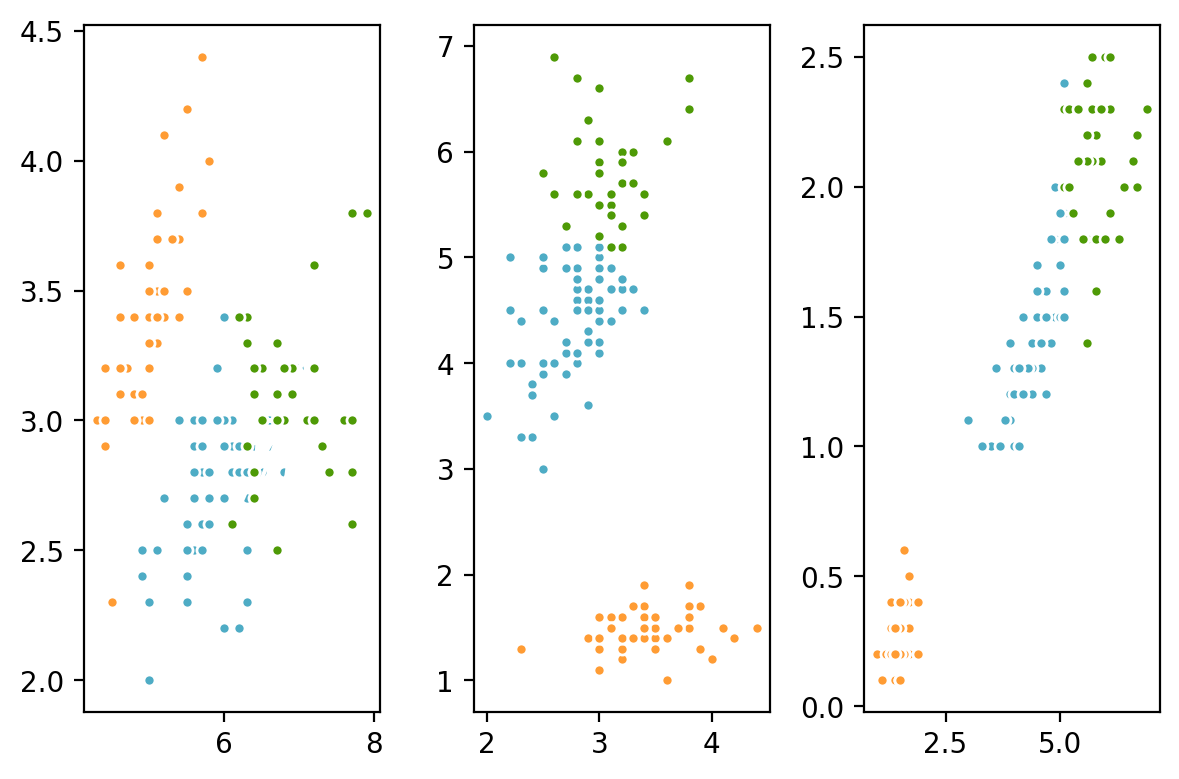

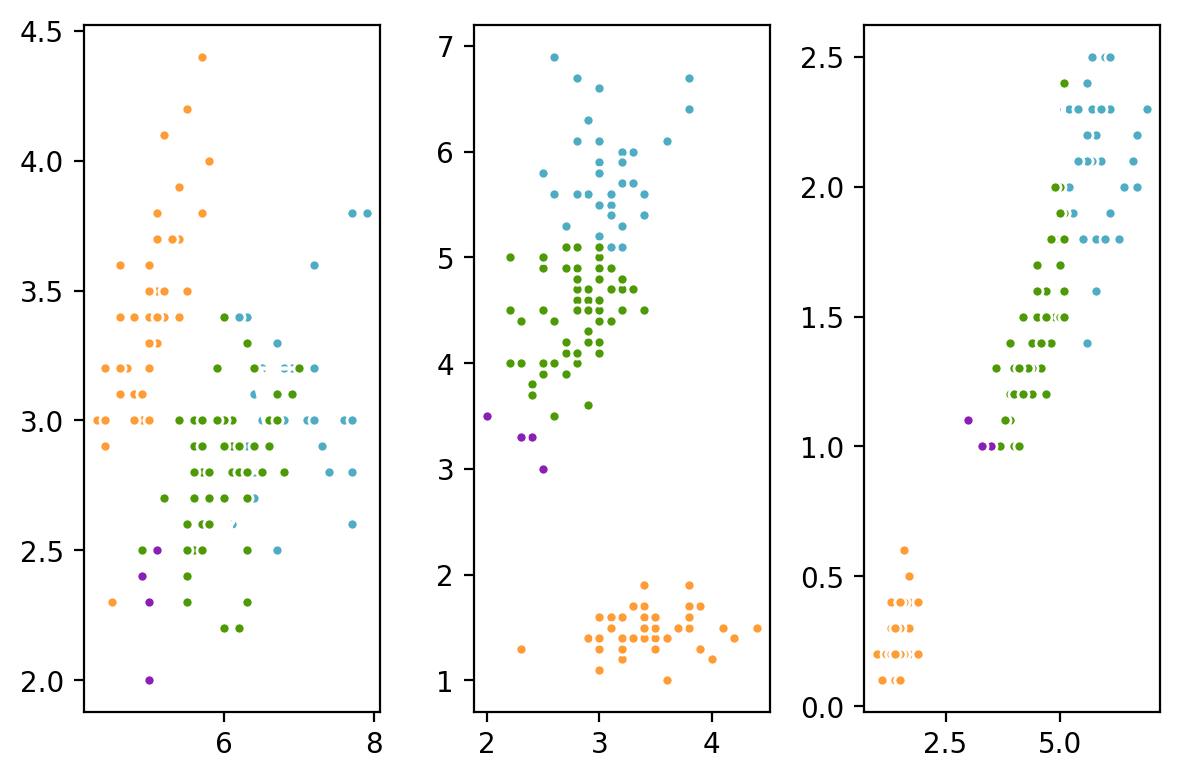

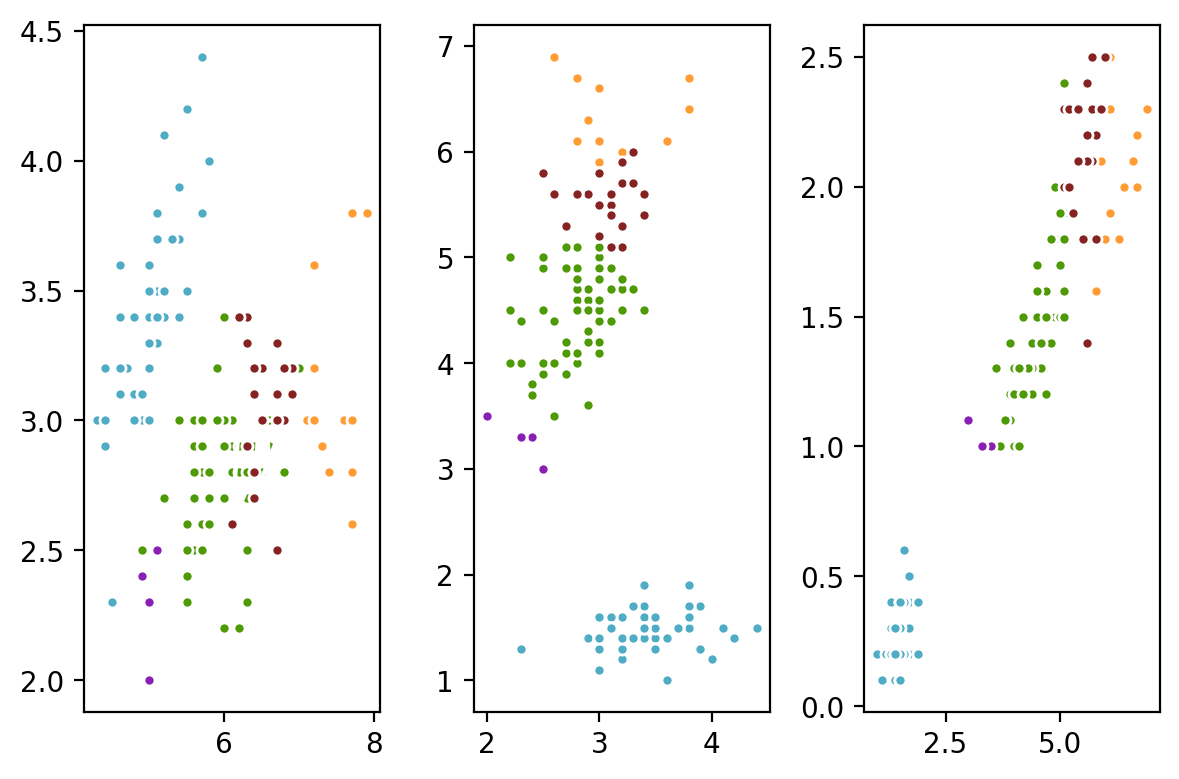

In [55]:
for i in range(2,6):
    hier = AgglomerativeClustering(n_clusters=i, linkage='average')
    hier = hier.fit(no_labeled_data)
    hier_plot(hier, no_labeled_data, i)

In [19]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

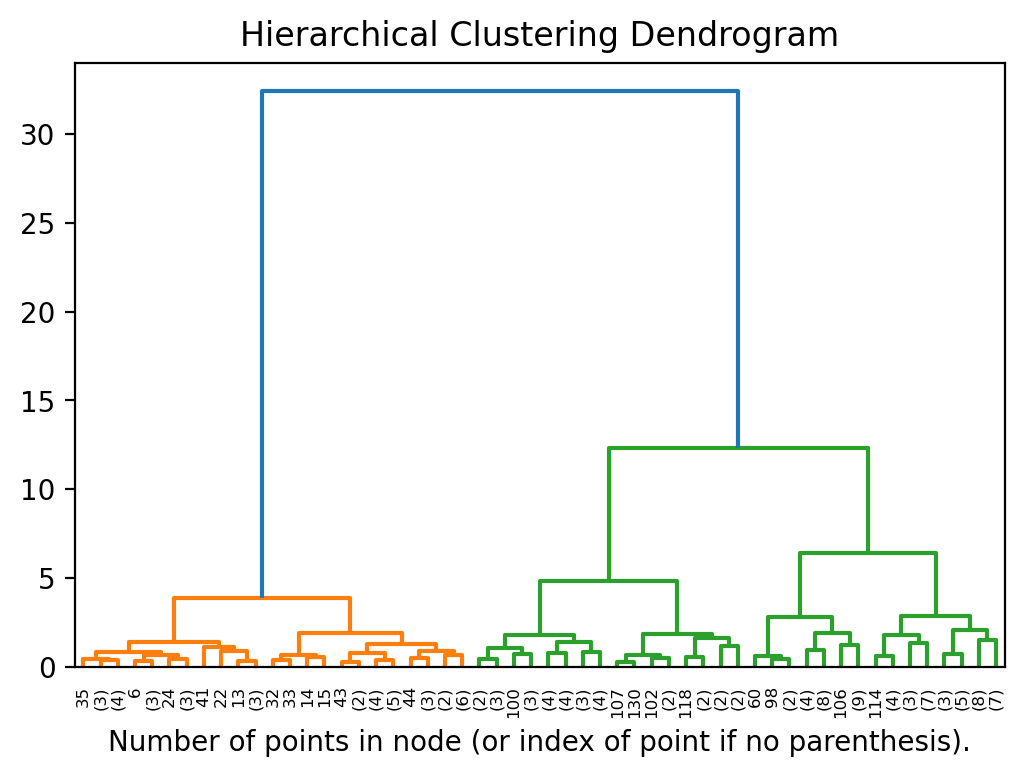

In [20]:
# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(no_labeled_data)

plt.title('Hierarchical Clustering Dendrogram')

# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=5)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [21]:
data1 = np.zeros([250,2])

for i in range(250):
    r = random.uniform(1, 3)
    a = random.uniform(0, 2 * math.pi)
    data1[i,0] = r * math.sin(a)
    data1[i,1] = r * math.cos(a)

data2 = np.zeros([500,2])

for i in range(500):
    r = random.uniform(5, 9)
    a = random.uniform(0, 2 * math.pi)
    data2[i,0] = r * math.sin(a)
    data2[i,1] = r * math.cos(a)
data = np.vstack((data1, data2))

In [22]:
hier = AgglomerativeClustering(n_clusters=2, linkage='ward')
hier = hier.fit(data)
hier_labels = hier.labels_

In [23]:
def aggl_plot(aggl, data):
    my_members = aggl.labels_ == 0
    plt.plot(data[my_members, 0], data[my_members, 1], 'w', marker='o',
        markersize=4,
        color='red',linestyle='None')

    my_members = aggl.labels_ == 1
    plt.plot(data[my_members, 0], data[my_members, 1], 'w', marker='o',
        markersize=4,
        color='blue',linestyle='None')
    plt.show()

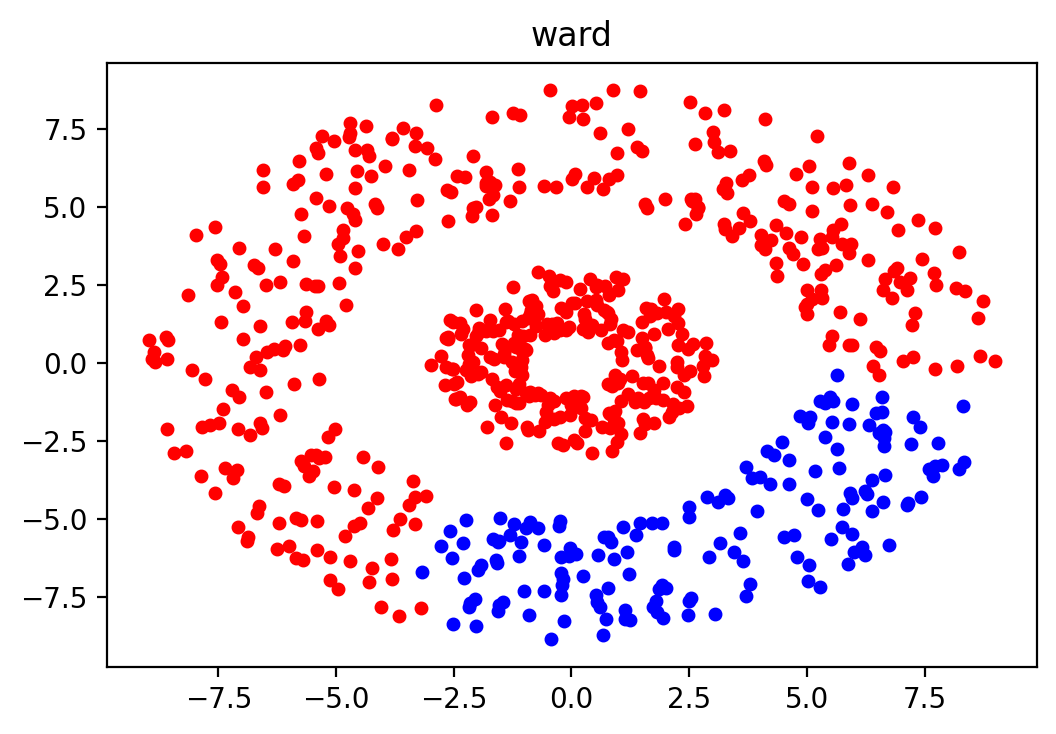

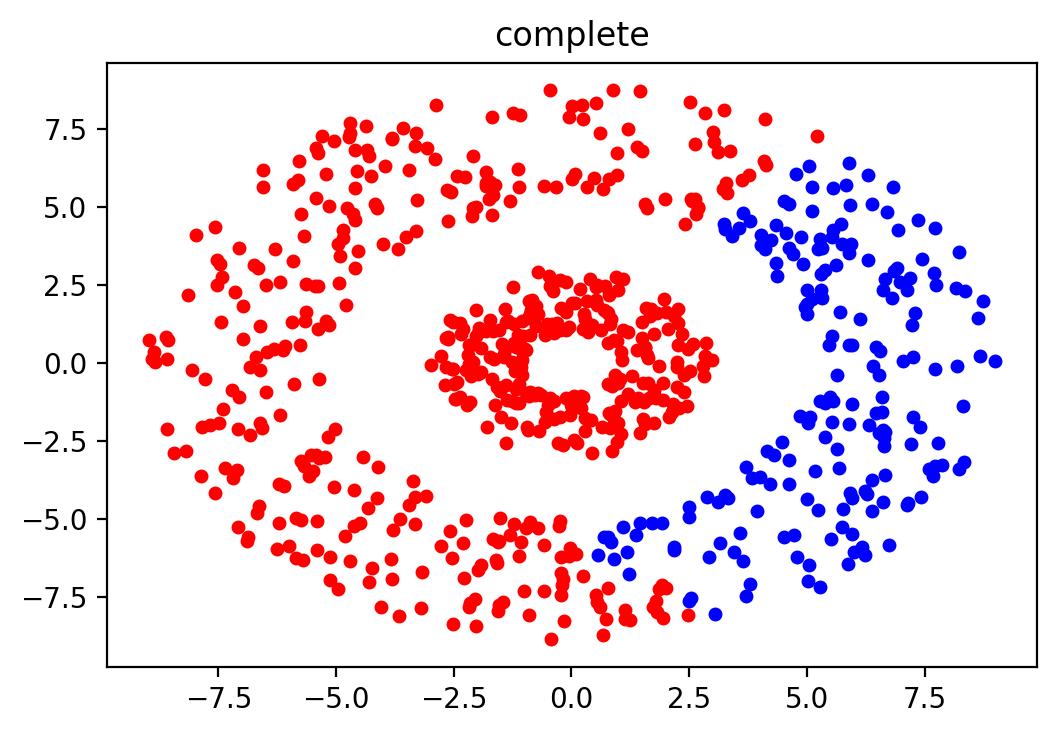

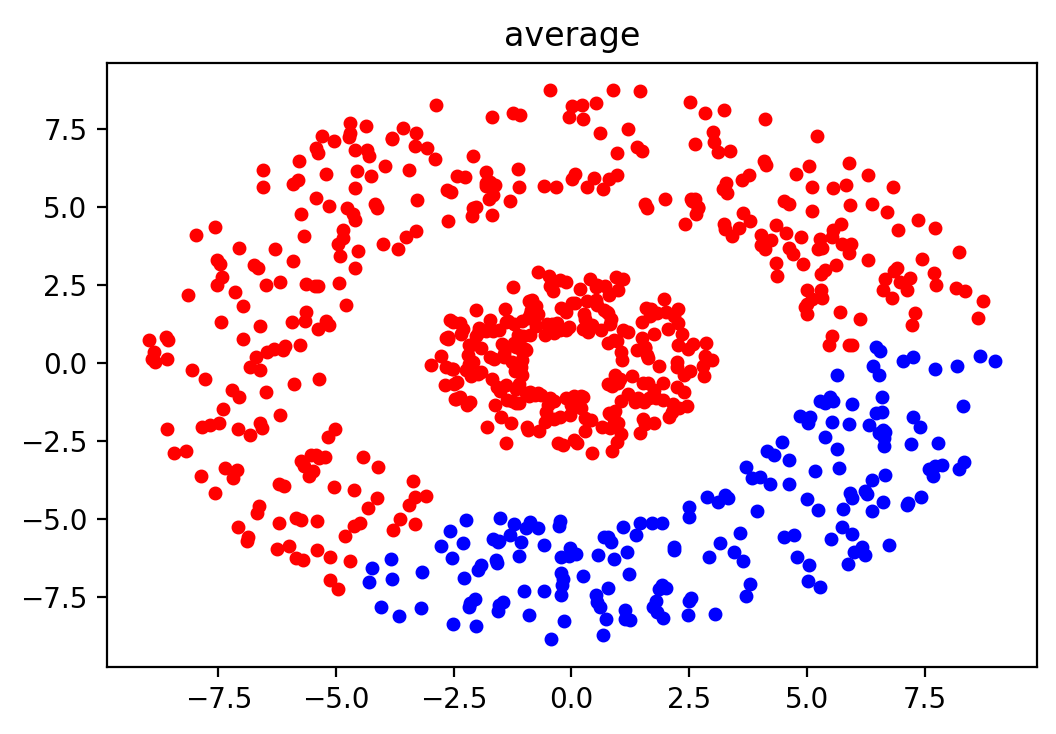

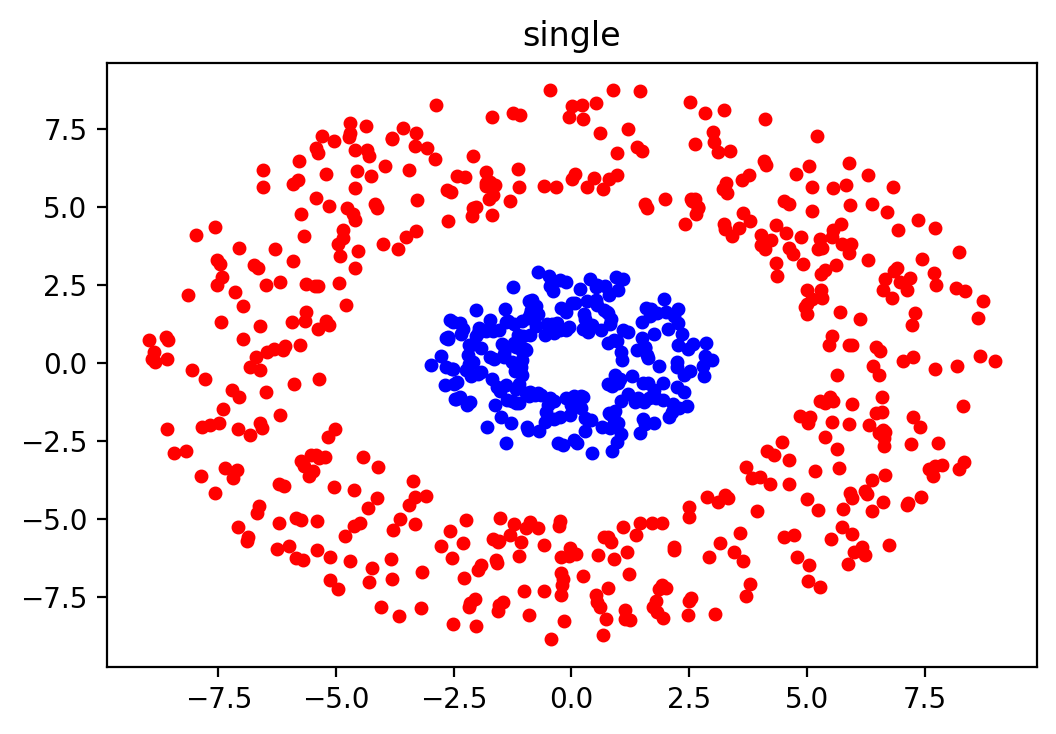

In [24]:
linkages = ['ward', 'complete', 'average', 'single']

for linkage in linkages:
    hier = AgglomerativeClustering(n_clusters=2, linkage=linkage)
    hier = hier.fit(data)
    plt.title(linkage)
    aggl_plot(hier, data)